In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Check missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
#Easiset way - delete the row or data point to handle missing value
#Disadvantage - losing huge amount of data and it is not advisable to delete the null value datapoints

df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [7]:
#column wise deletion
df.dropna(axis=1) #drop the columns that we have nan values (age and embarked dropped)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


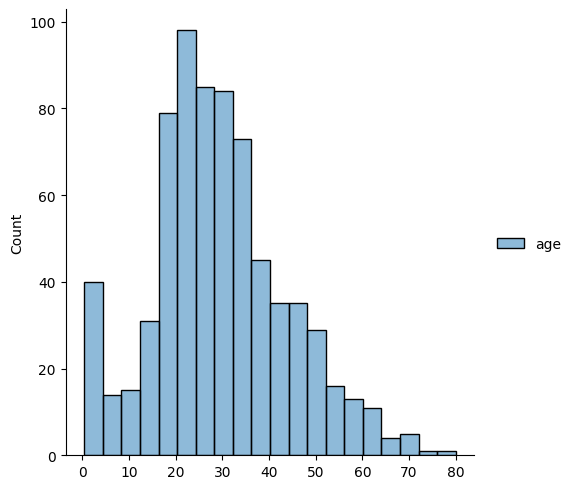

In [8]:
# Imputation_Missing_Techniques

# 1. Mean_Value_Imputation
#Mean imputation works well when we have the data as normally distributed data
sns.displot([df['age']])

<Axes: xlabel='age', ylabel='Count'>

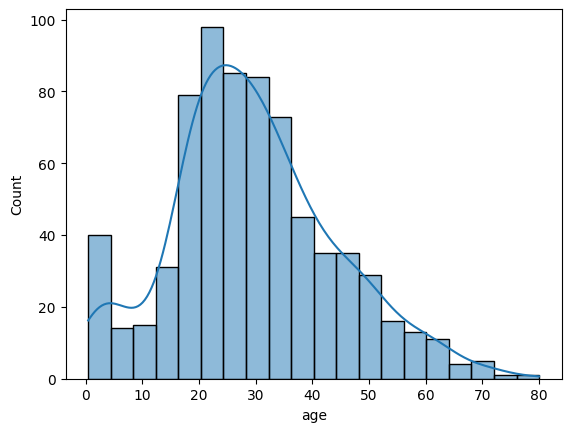

In [10]:
sns.histplot(df['age'],kde=True)

In [11]:
df['Age_Mean']=df['age'].fillna(df['age'].mean())

In [13]:
df[['Age_Mean','age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [14]:
#2. Median_Value_Imputation
#We use the technique when we have some outliers in the dataset

df['Age_Median']=df['age'].fillna(df['age'].median())

In [17]:
df[['Age_Median','Age_Mean','age']]

,Age_Median,Age_Mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [18]:
#3. Mode_Imputation_Technique
#This techinque is especially used in categorical values

In [19]:
df['embarked']

,embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [21]:
df[df['embarked'].isnull()] #kind of MCAR - no realationship

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [22]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df['embarked'].notna()

,embarked
0,True
1,True
2,True
3,True
4,True
...,...
886,True
887,True
888,True
889,True


In [24]:
df[df['embarked'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [27]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [28]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [29]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [30]:
df['embarked_mode'].isnull().sum()

0

In [31]:
df['embarked'].isnull().sum()

2